<H1 style="text-align: center;">Lots of struggle, Plenty of progress</H1>

<H3 style="text-align: center;">“IF THERE IS NO STRUGGLE, THERE IS NO PROGRESS” - FREDERICK DOUGLASS
</H3>


In [464]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import tree
# import graphviz
from sklearn import metrics 

%matplotlib inline

In [496]:
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)

In [502]:

raw = pd.read_csv('../train.csv')
checks = raw
working_df = raw
print("Original data frame shape:",raw.shape)


Original data frame shape: (1460, 81)


Getting Started ^^^^^^

In [ ]:
def check_for_nulls(df):
    heatmap, ax2 = plt.subplots(figsize = (20,15))
    # ax2=sns.heatmap(raw.isnull(),yticklabels=False,cbar=False,cmap='viridis') #cmap='YlGnBu
    ax2=sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
    
check_for_nulls(working_df)

In [468]:
# lis = ["LotFrontage","Alley","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu",
# "GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]
# a=[]
# for i in lis:
#     if checks[i].dtype == 'int64' or checks[i].dtype == 'float64':
#         a.append(i+ ' '+str(checks[i].dtype))
        
# print(a)

# ['LotFrontage', 'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC']

In [487]:
checks[["LotFrontage","Alley","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu",
"GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]].isna().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [489]:
checks['TotalBsmtSF'].isna().sum()

0

In [503]:
# Not every N/a is equal in this dataset.
# fixNa() relabels the n/a's that actually mean "not included" and drops the true N/a's 

def fixNa(df, stage):
    ### correct mislabled NAs
    
    # naMeanings = [
    #     "LotFrontage","Alley","MasVnrType","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu",
    #     "GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]
       
    naMeanings = [
        "LotFrontage","GarageQual","GarageCond",'GarageYrBlt']
    p = [
        "BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu"]
    
    s = ["GarageType","GarageFinish","PoolQC","Fence","MiscFeature"]
    
    x = ["Alley","MasVnrType","BsmtQual"]
    # "LotFrontage" "GarageYrBlt" "MasVnrType"  
    
    for col in naMeanings:
        if col == "LotFrontage":
           df['LotFrontage'].fillna(value=df['LotFrontage'].mean(), inplace=True)
        elif col == 'GarageYrBlt':
            df['GarageYrBlt'].fillna(value=0, inplace=True)
        else:
            df[col].fillna("notIncluded", inplace=True)
            # df[col].fillna(0, inplace=True)
    for col in s:
        if col == "LotFrontage":
           df['LotFrontage'].fillna(value=df['LotFrontage'].mean(), inplace=True)
        elif col == 'GarageYrBlt':
            df['GarageYrBlt'].fillna(value=0, inplace=True)
        df[col].fillna("senceless", inplace=True)
        
    for col in p:
        if col == "LotFrontage":
           df['LotFrontage'].fillna(value=df['LotFrontage'].mean(), inplace=True)
        elif col == 'GarageYrBlt':
            df['GarageYrBlt'].fillna(value=0, inplace=True)
        df[col].fillna("faith", inplace=True)
    for col in x:
        if col == "LotFrontage":
           df['LotFrontage'].fillna(value=df['LotFrontage'].mean(), inplace=True)
        elif col == 'GarageYrBlt':
            df['GarageYrBlt'].fillna(value=0, inplace=True)
        df[col].fillna("tatertots", inplace=True)

    # ### remove true NAs
    # ### NOTE ### i am not droping the true N/a's in the testing
    # if stage == "training":
    #     df.dropna(axis=0, inplace = True)
    df.dropna(axis=0, inplace = True)   
    
    return df

In [470]:

# raw['LotFrontage'].fillna(value=raw['LotFrontage'].mean(), inplace=True)
# raw['LotFrontage']

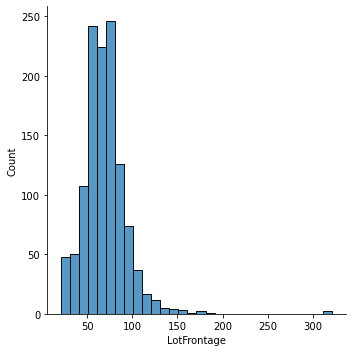

In [471]:
sns.displot(checks, x="LotFrontage", binwidth=10)


In [472]:
checks['GarageYrBlt'].fillna(value=checks['GarageYrBlt'].mean(), inplace=True)


In [473]:
checks['GarageYrBlt'].isna().count()

1460

In [474]:
fixNa(checks, 'test')
checks.loc[checks['GarageYrBlt']=='notIncluded']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [475]:
checks[['GarageYrBlt','YearBuilt']]

,GarageYrBlt,YearBuilt
0,2003.0,2003
1,1976.0,1976
2,2001.0,2001
3,1998.0,1915
4,2000.0,2000
...,...,...
1455,1999.0,1999
1456,1978.0,1978
1457,1941.0,1941
1458,1950.0,1950


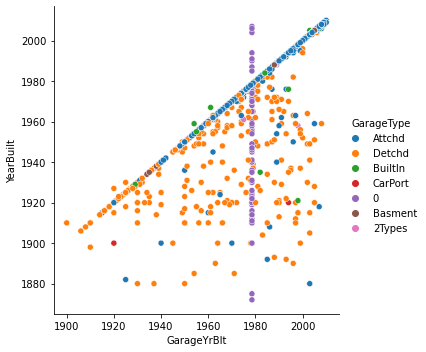

In [476]:
sns.relplot(x="GarageYrBlt", y="YearBuilt", hue='GarageType',data=checks)

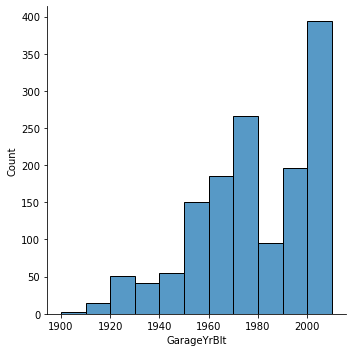

In [477]:
sns.displot(checks, x="GarageYrBlt", binwidth=10)


In [478]:
# feature_selecting_prep() ******IMPORTANT***** >> returns df with the top NUMERICAL features to train model
# this can only be used for training... you wont have the target with real data
### NOTE ### need to store list of important features to use in testing (not the testing paired with training)
corr_val = .5

def feature_selecting_prep(df, target_value):
    numericFeatures= [
    'LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
    'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice'
]
    ### df of target correlation values
    # target_corr = df.corr()[[target_value]].sort_values(by=target_value, ascending=False)
    # target_corr = df[numericFeatures].corr()[[target_value]]
    target_corr = df.corr()[[target_value]]

    
    ### find features w/ corr value greater than/= to .5 w/ the target 
    top_feat = target_corr.loc[target_corr[target_value] >=corr_val] 
    
    ### find these important columns/features using the entire working data set
    ready_df = df[top_feat.index.tolist()]
    num_feat_list = ready_df.columns.tolist()
    
    return num_feat_list, target_corr.index.tolist() 
# fixNa(working_df, 'test')
# feature_selecting_prep(working_df, 'SalePrice')

In [479]:
# category_info() hold all needed info on categorical data and returns whats needed for encoding
# ordinal_feat=0

def category_info():
# removed: 'OverallQual','OverallCond', 'MSSubClass' b/c they had numbers already 
    ordinal = {'Alley':['Pave','Grvl','notIncluded'],
               'LotShape':['Reg','IR1','IR2','IR3'],
               'LandSlope':['Gtl','Mod','Sev'],
               'ExterQual':['Ex','Gd','TA','Fa','Po'],
               'ExterCond':['Ex','Gd','TA','Fa','Po'],
               'BsmtQual':['Ex','Gd','TA','Fa','Po','notIncluded'],
               'BsmtCond':['Ex','Gd','TA','Fa','Po','notIncluded'],
               'BsmtExposure':['Gd','Av','Mn','No','notIncluded'],
               'BsmtFinType1':['GLQ','ALQ','BLQ','Rec','LwQ','Unf','notIncluded'],
               'BsmtFinType2': ['GLQ','ALQ','BLQ','Rec','LwQ','Unf','notIncluded'],
               'CentralAir':['Y','N'],
               'HeatingQC':['Ex','Gd','TA','Fa','Po'],
               'KitchenQual':['Ex','Gd','TA','Fa','Po'],
               'Functional':['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal'],
               'FireplaceQu':['Ex','Gd','TA','Fa','Po','notIncluded'],
               'GarageFinish':['Fin','RFn','Unf','notIncluded'], 
               'GarageQual':['Ex','Gd','TA','Fa','Po','notIncluded'],
               'GarageCond':['Ex','Gd','TA','Fa','Po','notIncluded'],
               'PavedDrive':['Y','P','N'],
               'PoolQC':['Ex','Gd','TA','Fa','notIncluded']}
    
    nonordinal_feat = ['MSZoning','Street','LandContour','Utilities','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','Electrical','GarageType','Fence','MiscFeature','SaleType' ,'SaleCondition',]

    
    # i need the category options (by rank) for the ordinal features
    ordinal_ranking = []
    ordinal_feat = []
    for i in ordinal:
        ordinal_ranking.append(ordinal[i])
        ordinal_feat.append(i)
        
    return ordinal_ranking, ordinal_feat, nonordinal_feat
    

In [480]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# encode(ordinal and random) categorical features 
def encode_cats(df):

    # separtate ordinal cat and non-ordinal one
    rank, ord_feat, nonord_cat_feat = category_info()
    
    ###### ORDINAL ENCODING ###########
    X = df[ord_feat]
    oc = OrdinalEncoder(categories=rank)
    ord_transformed =  oc.fit_transform(X)
    df[ord_feat]= ord_transformed
    
    ###### 1-HOT ENCODING ###########
    ohe = OneHotEncoder(handle_unknown ='ignore')
    X = df[nonord_cat_feat] # select what to encode
    ohe_transformed = ohe.fit_transform(X).toarray() # encode what you selected
    ohe_columns = ohe.get_feature_names_out() # get new column names
    enc = pd.DataFrame(ohe_transformed,columns=ohe_columns)
    # need to reset index b/c somehow without it it adds extra columns
    df = pd.concat([df.reset_index(drop=True),enc.reset_index(drop=True)],axis=1) # add columns to original dataframe
    df.drop(df[nonord_cat_feat],axis=1,inplace=True)
    
    
    return df

# q = encode_cats(working_df)


In [481]:
# # feature_selecting() drops NUMERICAL columns that didn't meet the feature_selecting_prep()'s qualifications... 
# # aka it drops whatever feature_selecting_prep() didn't return
# ### NOTE ### this needs to be redone b/c I forgot to make it work for catgegorical features

# def feature_selecting(df,numbericalCatList, allNumericalFeat):
#     for feature in allNumericalFeat:
#         if feature not in numbericalCatList:
#             df.drop(feature, inplace=True, axis=1)

#     # for feature in df.columns:
#     #     if feature not in numbericalCatList:
#     #         df.drop(feature, inplace=True, axis=1)
#             # print(df.columns)
#     return df

In [482]:
def preprocessing(df):
    df = fixNa(df, 'test')
    num_feat_list, best_num_feat = feature_selecting_prep(df, 'SalePrice')
    df = encode_cats(df)
    return df

In [504]:
working_df = preprocessing(working_df)
working_df

ValueError: Found unknown categories ['tatertots'] in column 0 during fit

In [306]:
# working_df = fixNa(working_df, 'test')
# num_feat_list, best_num_feat = feature_selecting_prep(working_df, 'SalePrice')
# working_df = encode_cats(working_df)

# Training

In [406]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [497]:
y = working_df['SalePrice']
X = working_df.drop(['SalePrice', 'Id'], axis =1) # don't forget this step

# def trainModel(y,X):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
# trainModel(y,X)

In [314]:
columns = working_df.columns.tolist()

In [331]:
working_df[[columns[40]]]

,GarageYrBlt
0,2003.0
1,1976.0
2,2001.0
3,1998.0
4,2000.0
...,...
1446,1999.0
1447,1978.0
1448,1941.0
1449,1950.0


In [328]:
x1 = working_df[columns[40:70]]
x2 = working_df[columns[121:220]]
x3 = working_df[columns[221:320]]
x4 = working_df[columns[321:457]]

In [498]:
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2, random_state=0)

regressor.fit(X_train, y_train)

ValueError: could not convert string to float: 'notIncluded'

In [ ]:

regressor.fit(X_train, y_train)

In [ ]:
train_score = regressor.score(X_train, y_train) 
test_score = regressor.score(X_test, y_test)

# Predict

# the real test data
test_data_raw = pd.read_csv('../test.csv')

test_data = preprocessing(test_data_raw)
test_data = feature_selecting(test_data,good_columns)
test_data_id = test_data['Id']
test_data_id
pred_score = regressor.predict(test_data.drop('Id', axis=1))


In [ ]:
# can do with more time:
# remove outliers first
# remove similar features
# normalize